![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Prevendo Esgotamento dos Funcionários no Sistema Financeiro</font>

O Dia Mundial da Saúde Mental é comemorado em 10 de outubro de cada ano. O objetivo deste dia é **aumentar a conscientização sobre as questões de saúde mental em todo o mundo** e mobilizar esforços em apoio à saúde mental. 


![](https://sertms.com/wp-content/uploads/2020/10/post_thumbnail-327dbe80b7dac1312e066b24a6e678bd.jpg) 



De acordo com uma pesquisa anônima, cerca de **450 milhões de pessoas vivem com transtornos mentais** que podem ser uma das principais causas de problemas de saúde e deficiência em todo o mundo.


![](https://otimiza.pro/wp-content/uploads/2020/10/sindrome-de-burnout-e-saude-bucal9.jpg)


Você é um Cientista de Dados em uma empresa. Você tem a tarefa de **compreender e observar a saúde mental de todos os funcionários de sua empresa**. 

Portanto, você deve **prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas para que seus funcionários não fiquem assim...

![](https://i.gifer.com/ZGYd.gif)

# <font color='GREY'> Empresas Bem Conceituadas em Relação à Qualidade de Vida dos Funcionários</font>
######Fonte: https://exame.com/carreira/as-50-empresas-que-tem-os-funcionarios-mais-felizes-no-brasil/

![](https://mir-s3-cdn-cf.behance.net/project_modules/fs/95989f68415161.5b5cbc9821554.gif)

![](https://cienciadosdados.com/images/2021/creditas.png)

#1° Problema de Negócio


![](https://media.giphy.com/media/l46CeDBwmtMi1ddkc/giphy.gif)

#### Precisamos **prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas para a saúde Mental dos seus colaboradores.


#2° Análise Exploratória dos Dados


#### Fontes:
https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge

![](https://cienciadosdados.com/images/2021/ad_rh.png)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Avaliação da Máquina Preditiva
from sklearn.metrics import mean_squared_error, r2_score
import math

In [4]:
# Importando o dataset
df = pd.read_csv("/content/RH_Data_Fatige.csv",sep = ",")

#Vendo as primeiras linhas
print("shape of dataframe is : ", df.shape)
df.head(1)

shape of dataframe is :  (22750, 9)


Employee ID Date of Joining  ... Mental Fatigue Score Burn Rate
0  fffe32003000360033003200      2008-09-30  ...                  3.8      0.16

[1 rows x 9 columns]

#### Estatísticas das Variáveis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


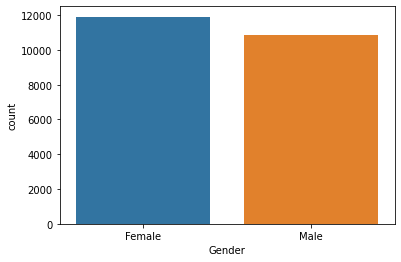

In [5]:
df['Gender'].value_counts()
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


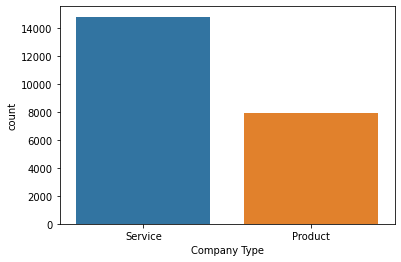

In [6]:
df['Company Type'].value_counts()
sns.countplot(df['Company Type'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


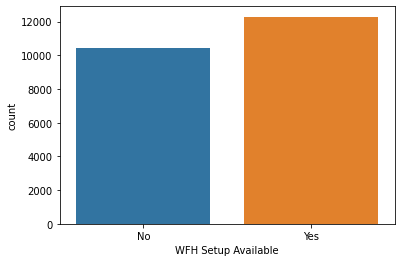

In [7]:
df['WFH Setup Available'].value_counts()
sns.countplot(df['WFH Setup Available'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


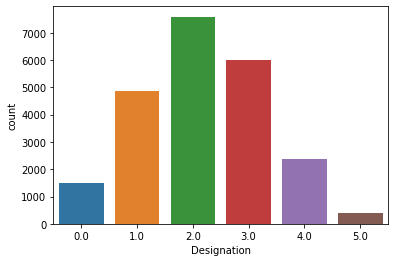

In [8]:
df['Designation'].value_counts()
sns.countplot(df['Designation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


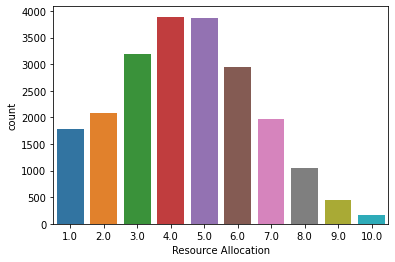

In [9]:
df['Resource Allocation'].value_counts()
sns.countplot(df['Resource Allocation'])

In [10]:
# Check for missing values
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [11]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

In [12]:
df.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

#3° Pré-Processamento dos Dados

In [13]:
#function to find out total days
def create_days_count(data):
    return (current_date - data["Date of Joining"])

In [14]:
#Converting date of joining column to pandas datetime format
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

### Imputação de Valores Missing

In [15]:
#Null Value Imputation
rev_null=['Resource Allocation','Mental Fatigue Score','Burn Rate']
df[rev_null]=df[rev_null].replace({np.nan:df['Resource Allocation'].mean(),
                                   np.nan:df['Burn Rate'].mean(),
                                   np.nan:df['Mental Fatigue Score'].mean(),
                                   })


In [16]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
dtype: float64

#### Engenharia de Atributos - Criando campo "dias de trabalho"

In [17]:
#get todays date time
current_date = pd.to_datetime('today')  
#Creating new column days_count
df["days_count"] = df.apply(create_days_count, axis=1).dt.days

In [18]:
df.head()

Employee ID Date of Joining  ... Burn Rate days_count
0  fffe32003000360033003200      2008-09-30  ...      0.16       4647
1      fffe3700360033003500      2008-11-30  ...      0.36       4586
2  fffe31003300320037003900      2008-03-10  ...      0.49       4851
3  fffe32003400380032003900      2008-11-03  ...      0.20       4613
4  fffe31003900340031003600      2008-07-24  ...      0.52       4715

[5 rows x 10 columns]

#### LabelEncoder - Variáveis não numéricas

In [19]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [20]:
df['Company Type']=df['Company Type'].map({'Service':1,'Product':0})

In [21]:
df['WFH Setup Available']=df['WFH Setup Available'].map({'Yes':1,'No':0})

In [22]:
df.head()

Employee ID Date of Joining  ...  Burn Rate  days_count
0  fffe32003000360033003200      2008-09-30  ...       0.16        4647
1      fffe3700360033003500      2008-11-30  ...       0.36        4586
2  fffe31003300320037003900      2008-03-10  ...       0.49        4851
3  fffe32003400380032003900      2008-11-03  ...       0.20        4613
4  fffe31003900340031003600      2008-07-24  ...       0.52        4715

[5 rows x 10 columns]

In [ ]:
df.describe()

In [24]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
days_count              0.0
dtype: float64

### Eliminando Variáveis que não são explicativas para a previsão

In [25]:
#We will drop employeeid and date of joining columns.
df.drop(["Employee ID","Date of Joining"],axis=1,inplace=True)

In [ ]:
df

In [27]:
#criando variáveis ​​independentes como X e variável alvo / dependente como y
y= df.pop("Mental Fatigue Score")
X= df

### Fazendo a Amostragem dos Dados - Partition

In [28]:
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)

#get shape of train and test data
print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (18200, 7)
test data size: (4550, 7)


#4° Construíndo a Máquina Preditiva 


In [34]:
#build model
#xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor(n_estimators=200)


In [35]:
# treinamento
lgb_model.fit(X_train, y_train)
#xgb_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
y_predict= lgb_model.predict(X_test)
#y_predict= xgb_model.predict(X_test)


#5° Avaliação da Máquina Preditiva

In [37]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, y_predict)
#r2_score(y_test, lgb_model.fit(X_train, y_train).predict(X_test))

0.8050868611832278

XGB R2 = 0.8160

LGB R2 = 0.8050

```
# Isto está formatado como código
```



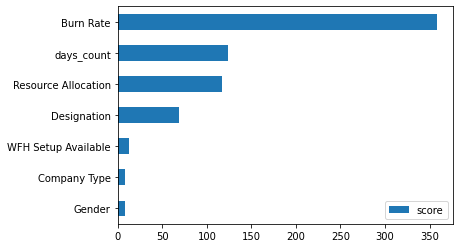

In [38]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending= True)
data.plot(kind='barh')

In [ ]:
#RMSE
#Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#print("RMSE: {:.2f}".format(Rmse_test))

# **Resumão**
![](https://i.pinimg.com/originals/55/01/60/5501609ee45d514d1f2c4a63502045e2.gif)

* Nesta aula, aprendemos a **Criar Máquina Preditiva** que prevê o Esgotamento do Funcionário para que medidas de atenção à saúde possam ser tomadas pelas empresas.
* Mais 1 Case com **LightGBM e XGBoost**
* **Imputação** de Valores Missing
* Criação de Variáveis - **Feature Engineering**
* Fez seu papel de cidadão ajudando às empresas a se posicionarem e **terem condições de realizar estudo avançado e profissional para medidas preventivas** e não reativas...




#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="600" height="380" src="https://www.youtube.com/embed/npOQwX2QCbw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### #Fonte:
https://en.wikipedia.org/wiki/Maslach_Burnout_Inventory